# Análise e Previsão de Séries Temporais

## Aula 01: Série Temporal

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
url = "https://raw.githubusercontent.com/Brunomatarucco/bootcamp_data_science_alura/main/Modulo_04/dados_tuberculose.csv"

dados = pd.read_csv(url, encoding="ISO-8859-1", sep =";",
                    skiprows = 3, skipfooter = 17, engine = "python")

In [ ]:
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [ ]:
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
14,2015,7111,6160,7833,6880,6893,6916,7531,7463,7189,7345,7287,6844,85452
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005


### Desafio 01 e 02: transformar os dados em uma série temporal Ano-Mês

In [ ]:
dados.columns = ['year', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul',
       'Ago', 'Set', 'Out', 'Nov', 'Dez', 'Total']
dados.set_index(dados.columns[0], inplace = True)
dados.drop("Total", axis = 1, inplace = True)

In [ ]:
dicionario_meses = {'Jan':1, 
                     'Fev':2,
                     'Mar':3,
                     'Abr':4,
                     'Mai':5,
                     'Jun':6,
                     'Jul':7,
                     'Ago':8,
                     'Set':9,
                     'Out':10,
                     'Nov':11,
                     'Dez':12}

In [ ]:
dados.rename(columns=dicionario_meses, inplace = True)
dados.reset_index(inplace = True)

In [ ]:
dados_melted = pd.melt(dados, id_vars=["year"],
                       value_vars= dados.columns[1:], 
                       var_name="month")

In [ ]:
dados_melted['month'] = dados_melted.month.astype("int64")
dados_melted["data"] = pd.to_datetime(dados_melted[['year', 'month']].assign(DAY=1))


In [ ]:
dados_melted.set_index('data', inplace= True)
dados_melted.reset_index(inplace = True)

In [ ]:
dados_melted.drop(["year","month"], axis = 1, inplace = True)

In [ ]:
dados_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    228 non-null    datetime64[ns]
 1   value   228 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB


In [ ]:
dados_st = dados_melted.copy()
dados_st.columns = ["data", "casos"]
dados_st.head()

,data,casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432


In [ ]:
# Continuação da aula \/

In [ ]:
sns.set_theme(style = 'darkgrid')

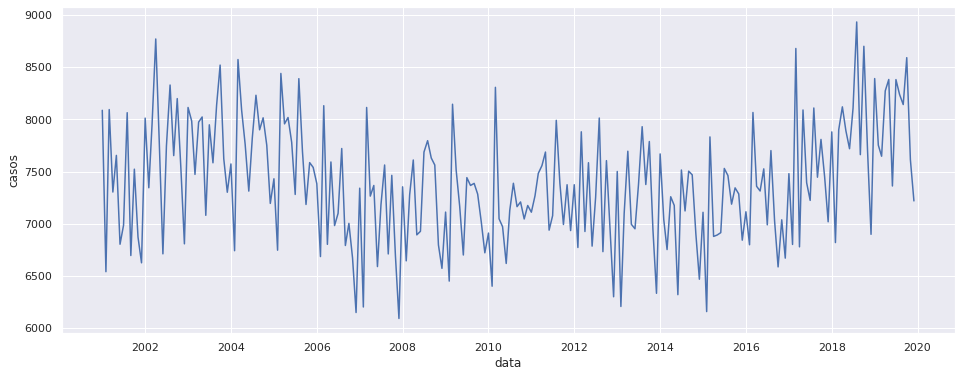

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data = dados_st, x = 'data', y = 'casos')
plt.show()

## Aula 02: Manipulação de datas

### Desafio 03: Faça a mesma transformação realizada em aula nas datas para a base de dados de Hanseníase.

In [ ]:
url_1 = "https://raw.githubusercontent.com/Brunomatarucco/bootcamp_data_science_alura/main/Modulo_04/dados_hanseniase.csv"

dados_han = pd.read_csv(url_1, encoding = "ISO-8859-1", engine = "python", 
                        sep=";",skiprows = 3, skipfooter = 11)

dados_han.head(27)

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,<1975,28,8,12,14,14,17,17,14,12,23,21,21,201
1,1975,-,1,-,-,-,-,-,-,-,-,-,1,2
2,1976,-,-,-,2,1,2,-,-,2,-,1,-,8
3,1977,2,-,-,1,-,-,-,-,-,1,1,-,5
4,1978,-,-,-,-,-,2,1,2,-,1,-,-,6
5,1979,2,1,1,-,-,1,3,3,2,3,-,-,16
6,1980,2,-,3,2,-,1,-,1,2,1,2,-,14
7,1981,2,2,1,1,1,2,-,-,1,3,-,-,13
8,1982,2,-,-,1,2,1,-,-,-,1,-,1,8
9,1983,4,-,4,-,1,-,-,2,2,1,1,2,17


In [ ]:
dados_han = dados_han[27:].copy()

In [ ]:
dados_han.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
41,2015,2729,2969,3476,2930,3017,2969,3018,3244,3241,3075,2819,2412,35899
42,2016,2393,2540,3000,2702,2616,2957,2603,3113,2881,2644,2528,2213,32190
43,2017,2585,2718,3162,2557,3243,2806,2739,3288,2856,3275,2961,2448,34638
44,2018,2971,2877,3276,3157,3237,2913,2976,3644,3274,3423,2909,2268,36925
45,2019,3105,3319,2804,3037,3047,2567,2856,3107,3060,3137,2715,1886,34640


In [ ]:
dados_han.drop("Total", axis = 1, inplace = True)

In [ ]:
dados_han.columns = ['year', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul',
                     'Ago', 'Set', 'Out', 'Nov', 'Dez']
dados_han.rename(columns=dicionario_meses, inplace=True)

In [ ]:
dados_han_st = pd.melt(dados_han, id_vars= "year", value_vars=dados_han.columns[1:], 
                       var_name= "month", value_name="casos")
dados_han_st

,year,month,casos
0,2001,1,4107
1,2002,1,3982
2,2003,1,4127
3,2004,1,4168
4,2005,1,4078
...,...,...,...
223,2015,12,2412
224,2016,12,2213
225,2017,12,2448
226,2018,12,2268


In [ ]:
dados_han_st = dados_han_st.astype("int64")

In [ ]:
dados_han_st["data"] = pd.to_datetime(dados_han_st[["year","month"]].assign(day=1))

In [ ]:
dados_han_st = dados_han_st[["data","casos"]].copy()

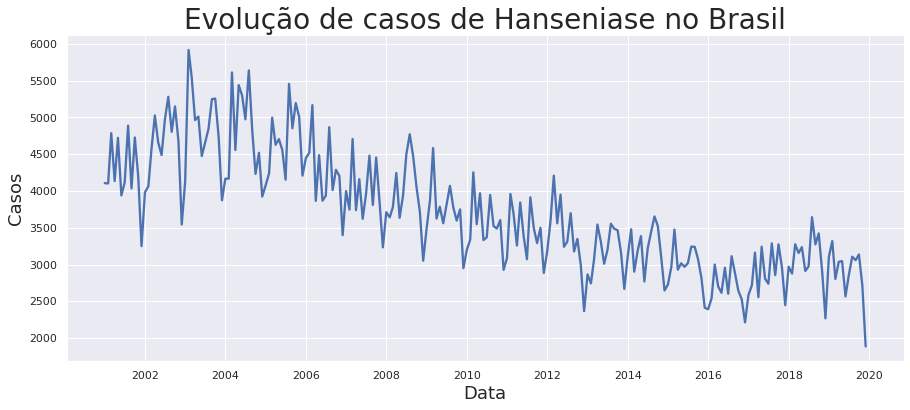

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = dados_han_st, x = "data", y = "casos", linewidth = 2.3)
ax.set_ylabel("Casos", fontsize = 18)
ax.set_xlabel("Data", fontsize = 18)
ax.set_title("Evolução de casos de Hanseniase no Brasil", fontsize = 28)

plt.show()

### Desafio 04: Configurar o gráfico de número de casos para deixá-lo mais elegante, analisar junto com um gráfico dos dados de hanseníase e compartilhar no discord suas hipóteses (deixar o gráfico bonitão).

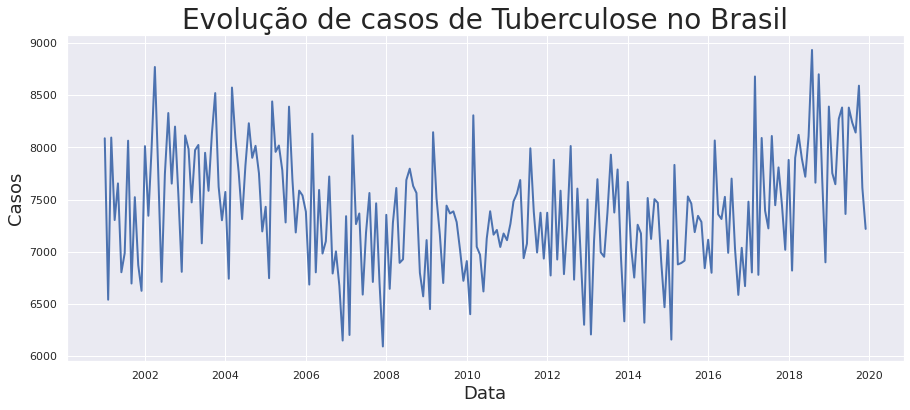

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
ax.set_ylabel("Casos", fontsize = 18)
ax.set_xlabel("Data", fontsize = 18)
ax.set_title("Evolução de casos de Tuberculose no Brasil", fontsize = 28)

plt.show()

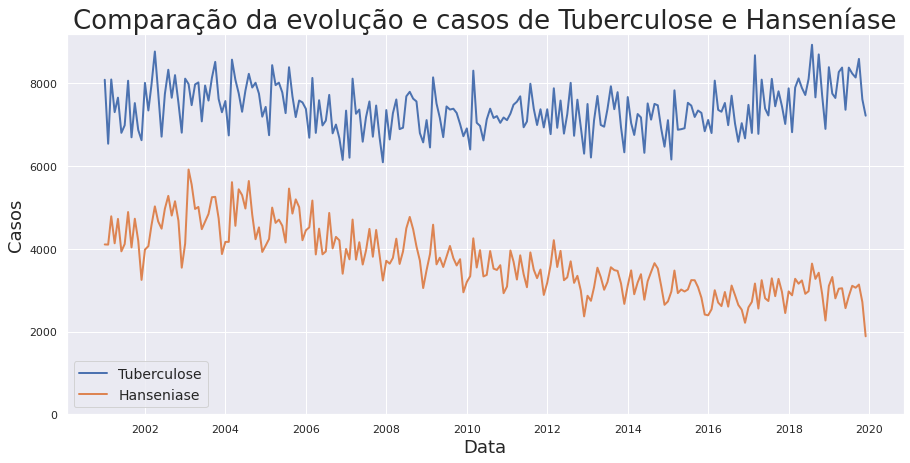

In [ ]:
plt.figure(figsize = (15,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_han_st, x = "data", y = "casos", linewidth = 2)

plt.ylim(0,9200)
plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Hanseníase", fontsize = 26)
plt.legend(("Tuberculose","Hanseniase"), fontsize = 14)
plt.show()


## Aula 03: Iniciando a Análise de Série Temporal

In [ ]:
dados_st['casos'].rolling(3).mean()

0              NaN
1              NaN
2      8072.000000
3      7900.666667
4      7707.000000
          ...     
223    6549.666667
224    6662.000000
225    6845.333333
226    6864.000000
227    7046.666667
Name: casos, Length: 228, dtype: float64

In [ ]:
dados_st.sort_values("data",inplace = True)

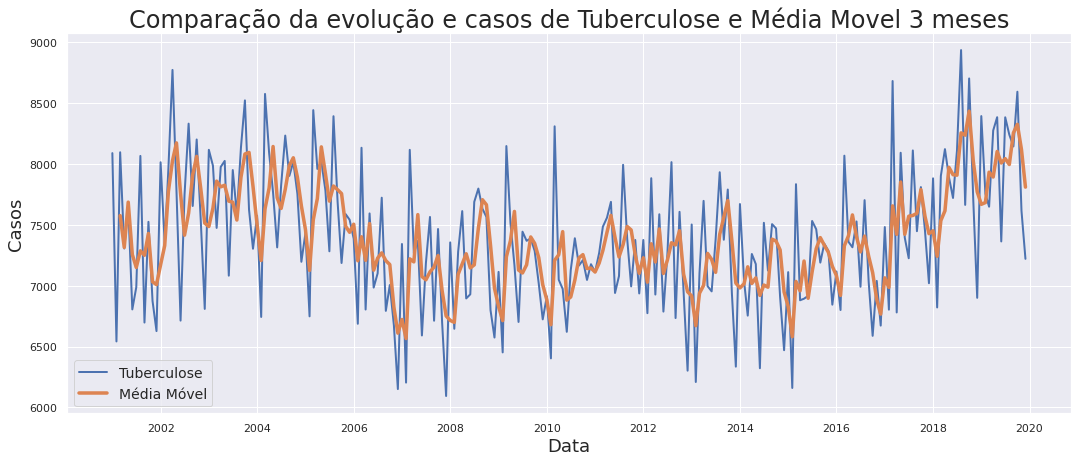

In [ ]:
dados_st['media_movel_3'] = dados_st['casos'].rolling(3).mean()

plt.figure(figsize = (18,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3", linewidth = 3.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Média Movel 3 meses", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel"), fontsize = 14)
plt.show()

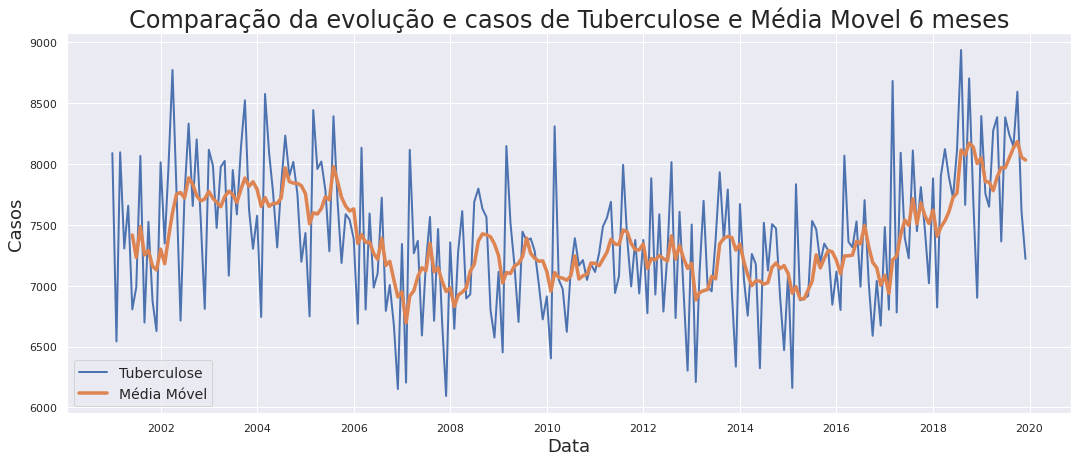

In [ ]:
dados_st['media_movel_6'] = dados_st['casos'].rolling(6).mean()

plt.figure(figsize = (18,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_6", linewidth = 3.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Média Movel 6 meses", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel"), fontsize = 14)
plt.show()

In [ ]:
dados_st.reset_index(drop=True, inplace = True)

In [ ]:
dados_st

,data,casos,media_movel_3,media_movel_6
0,2001-01-01,8088,NaN,NaN
1,2001-02-01,6542,NaN,NaN
2,2001-03-01,8095,7575.000000,NaN
3,2001-04-01,7305,7314.000000,NaN
4,2001-05-01,7656,7685.333333,NaN
...,...,...,...,...
223,2019-08-01,8239,7994.666667,8048.166667
224,2019-09-01,8143,8254.666667,8130.666667
225,2019-10-01,8592,8324.666667,8183.666667
226,2019-11-01,7615,8116.666667,8055.666667


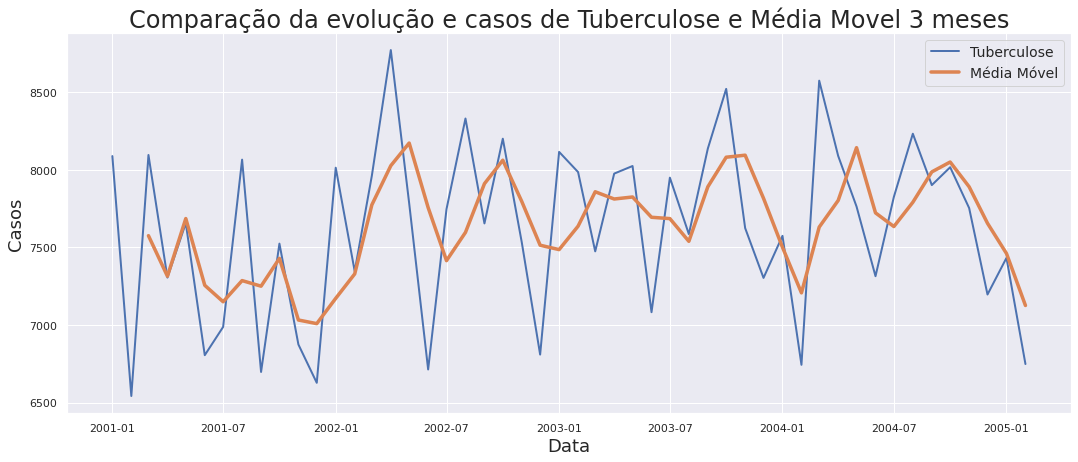

In [ ]:
plt.figure(figsize = (18,7))

sns.lineplot(data = dados_st[:50], x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_st[:50], x = "data", y = "media_movel_3", linewidth = 3.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Média Movel 3 meses", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel"), fontsize = 14)
plt.show()

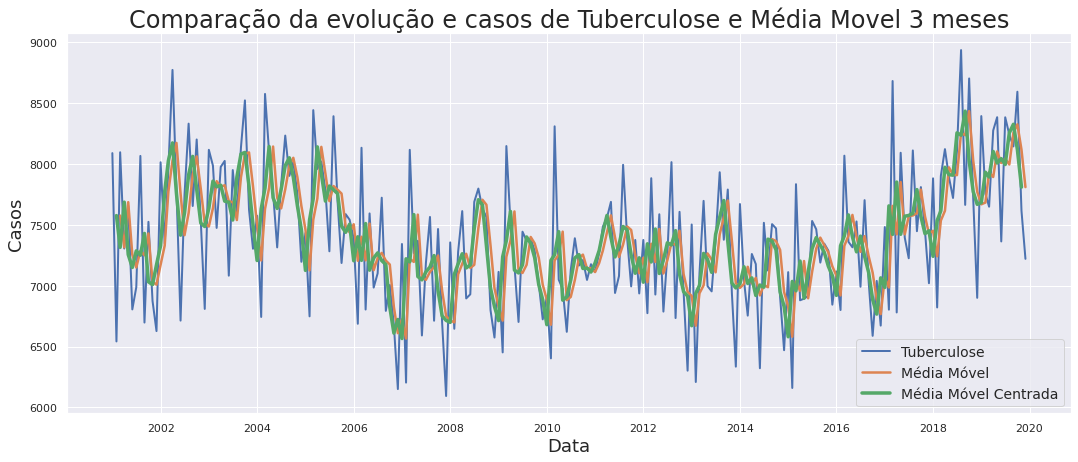

In [ ]:
plt.figure(figsize = (18,7))

dados_st['media_movel_3c'] = dados_st['casos'].rolling(3, center = True).mean()
dados_st['media_movel_6c'] = dados_st['casos'].rolling(6, center = True).mean()


sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3", linewidth = 2.5)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3c", linewidth = 3.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Média Movel 3 meses", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel","Média Móvel Centrada"), fontsize = 14)
plt.show()

### Desafio 05 - Analisar outras janelas de médias móveis, realizar a análise dessas janelas e compartilhar suas conclusões no Discord. Refletir sobre os impactos de uma suavização com janelas muito grandes.  

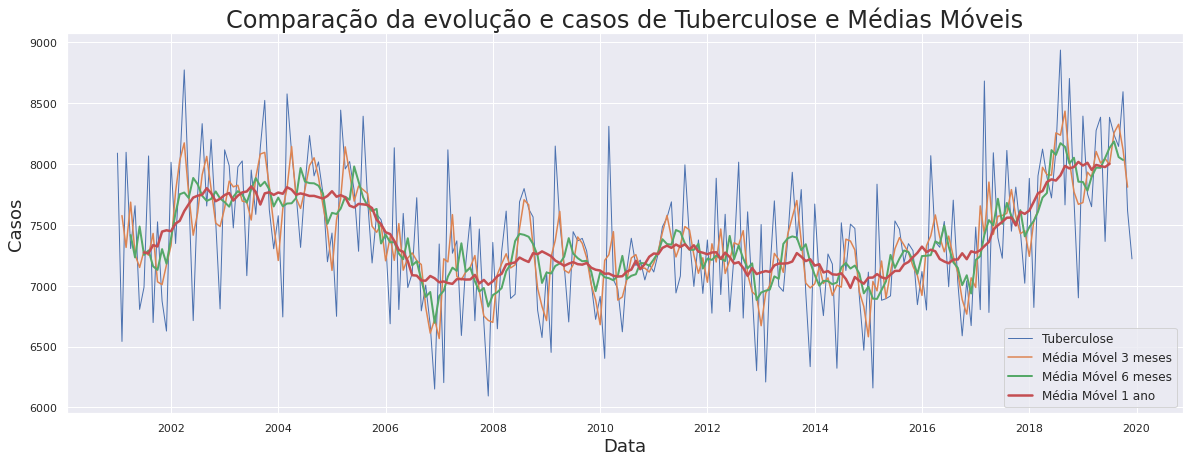

In [ ]:
dados_st['media_movel_12c'] = dados_st['casos'].rolling(12, center = True).mean()

plt.figure(figsize = (20,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 1)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3c", linewidth = 1.5)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_6c", linewidth = 2)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_12c", linewidth = 2.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução de casos de Tuberculose e Médias Móveis", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel 3 meses","Média Móvel 6 meses", "Média Móvel 1 ano"), fontsize = 12)
plt.show()

Quanto mais meses são colocados no rolling, mais suavizadas são as curvas. Até certo ponto existe uma vantagem de se suavizar uma curva pois facilita a compreensão de uma tendência geral. Porém, ao se suavizar demais, perde-se a granularidade e a especificadade dos dados. Segue abaixo um exemplo:

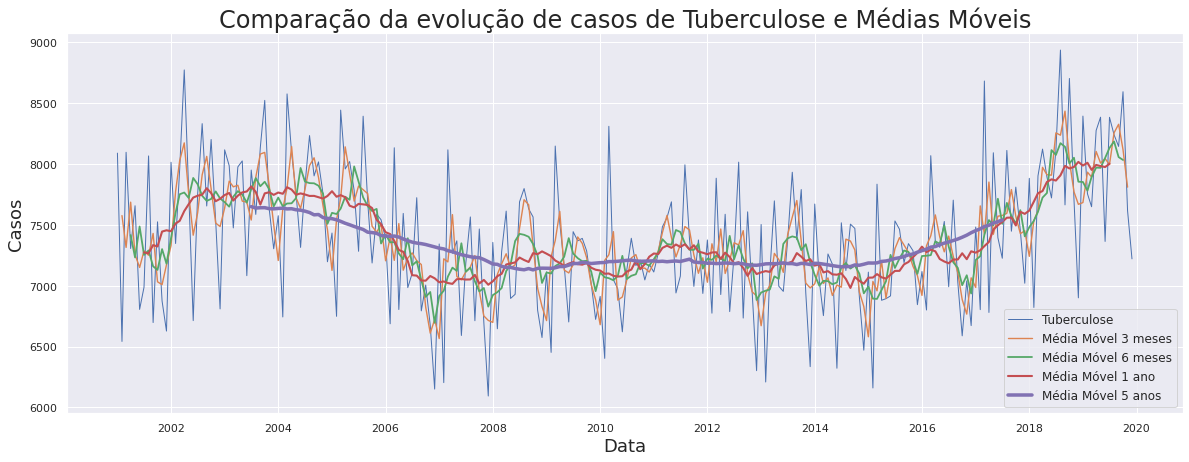

In [ ]:
dados_st['media_movel_60c'] = dados_st['casos'].rolling(60, center = True).mean()

plt.figure(figsize = (20,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 1)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3c", linewidth = 1.4)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_6c", linewidth = 1.8)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_12c", linewidth = 2.1)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_60c", linewidth = 3.5)


plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução de casos de Tuberculose e Médias Móveis", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel 3 meses","Média Móvel 6 meses", "Média Móvel 1 ano", "Média Móvel 5 anos"), fontsize = 12)
plt.show()

Com uma média móvel de 60 meses (5 anos), só é possível verificar uma tendência muito geral em relação aos dados. Não é possível verificar como os dados através dos anos.

Se o próposito é só compreender se os casos estão crescendo ou diminuindo, esse tipo de análise é possível, porém não existe um nível de detalhes dos dados.

### Desafio 06 - Pensar em como realizar sua primeira previsão usando as médias ou qualquer outra abordagem do seu interesse.

In [ ]:
media_total = dados_st.casos.mean()

In [ ]:
media_janeiros = dados_st[dados_st['data'].dt.month == 1]['casos'].mean().round(2)

In [ ]:
media_ultimos_3_janeiros = dados_st[dados_st['data'].dt.month == 1]['casos'][-3:].mean().round(2)

In [ ]:
media_ultimos_3_meses_2019 = dados_st.casos[-3:].mean()

AttributeError: ignored

In [ ]:
print("Média total= {:.2f}\nMédia de todos os janeiros= {:.2f}\nMédia dos últimos 3 Janeiros= {}\nMédia dos últimos 3 meses registrados = {}"
      .format(media_total,media_janeiros,media_ultimos_3_janeiros,media_ultimos_3_meses_2019))

Média total= 7389.29
Média de todos os janeiros= 7524.68
Média dos últimos 3 Janeiros= 7918.0
Média dos últimos 3 meses registrados = 7809.0


Entre todos os dados para fazer a previsão para Janeiro de 2020 eu faria a média dos últimos 3 janeiros e a média dos últimos 3 meses registrados para tentar prever o valor. 

Assim, levo em consideração as especificidades dos últimos meses de janeiro e também os últimos registros que estão mais próximos do mês à ser previsto.

## Aula 04: Decomposição e Auto Correlação